# Reconstruction Demo script

1. for horizontal line in stack X
   1. reconstruct
2. z-stack?

Sources: 

Volume viewer: https://www.datacamp.com/tutorial/matplotlib-3d-volumetric-data


In [24]:
from skimage.transform import iradon
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [35]:
PATH_TO_IMAGE =  '../data_store/spin_3/MMStack_Pos0.ome.tif'
im = io.imread(PATH_TO_IMAGE)
print(im.shape)

(10, 1392, 1040)


In [15]:
theta = np.linspace(0, 360, np.shape(im)[0])
theta

array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320., 360.])

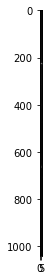

In [20]:
# Convert image stack to sinograms
# Want shape (length, width, angles)
sinogram = np.moveaxis(im, 0, -1)
io.imshow(sinogram[0])

In [37]:
reconstruction_fbp = np.zeros((im.shape[1], im.shape[2], im.shape[2]))
for i in range(im.shape[1]):
    reconstruction_fbp[i] = iradon(sinogram[i], theta=theta, filter_name='ramp')
    


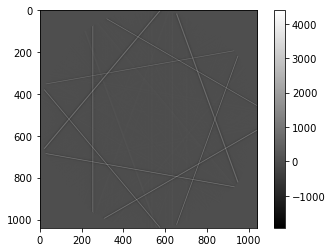

In [42]:
plt.imshow(reconstruction_fbp[2], cmap='gray')
plt.colorbar()

In [49]:
# This method is a bit slow

def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)
                
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])
    ax.set_title(ax.index)

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])
    ax.set_title(ax.index)

multi_slice_viewer(reconstruction_fbp)

In [45]:
%matplotlib 

Using matplotlib backend: MacOSX


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(index):
    return reconstruction_fbp[index]

max_index = im.shape[1]
allowed_indices = np.arange(0, max_index)

# Define initial parameters
init_index = 0


# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
display = ax.imshow(f(init_index))
ax.set_xlabel('lateral coordinate')
ax.set_ylabel('axial coordinate')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)

# # Make a horizontal slider to control the frequency.
ax_index = fig.add_axes([0.2, 0.1, 0.65, 0.03])
index_slider = Slider(
    ax=ax_index,
    label='Stack index',
    valmin=0,
    valmax= max_index,
    valstep = allowed_indices,
    valinit=init_index,
)

# # Make a vertically oriented slider to control the amplitude
# axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
# amp_slider = Slider(
#     ax=axamp,
#     label="Amplitude",
#     valmin=0,
#     valmax=10,
#     valinit=init_amplitude,
#     orientation="vertical"
# )


# The function to be called anytime a slider's value changes
def update(val):
    display = ax.imshow(f(index_slider.val))
    # ax.(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
index_slider.on_changed(update)
# amp_slider.on_changed(update)

# # Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
# resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
# button = Button(resetax, 'Reset', hovercolor='0.975')


# def reset(event):
#     freq_slider.reset()
#     amp_slider.reset()
# button.on_clicked(reset)

plt.show()